In [1]:
import os 
os.chdir("../")

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [3]:
df = pd.read_csv("artifacts\data_ingestion\Cement_Data.csv")
df.head()

,Unnamed: 0,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Concrete
0,0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()


,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Concrete
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
df.columns

Index(['Cement', 'Blast', 'Fly', 'Water', 'Superplasticizer', 'Coarse', 'Fine',
       'Age', 'Concrete'],
      dtype='object')

In [6]:
name_Col =df.columns.tolist()

In [13]:
#name_Col = [i.split(" ") for i in name_Col]
name_Col = [name_Col[i][0] for i in range(len(name_Col))]

In [14]:
name_Col

['Cement',
 'Blast',
 'Fly',
 'Water',
 'Superplasticizer',
 'Coarse',
 'Fine',
 'Age',
 'Concrete']

In [15]:
df.columns = name_Col

In [17]:
df.head()
df.to_csv("artifacts\data_ingestion\Cement_Data.csv")

In [12]:
df.to_csv("Cement_Data.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly               1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   Coarse            1030 non-null   float64
 6   Fine              1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   Concrete          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
df.isnull().sum()

Cement              0
Blast               0
Fly                 0
Water               0
Superplasticizer    0
Coarse              0
Fine                0
Age                 0
Concrete            0
dtype: int64

In [9]:
df.duplicated().sum()

25

In [10]:
df.drop_duplicates(keep='first',inplace=True)

In [11]:
df.reset_index(drop = True,inplace=True)

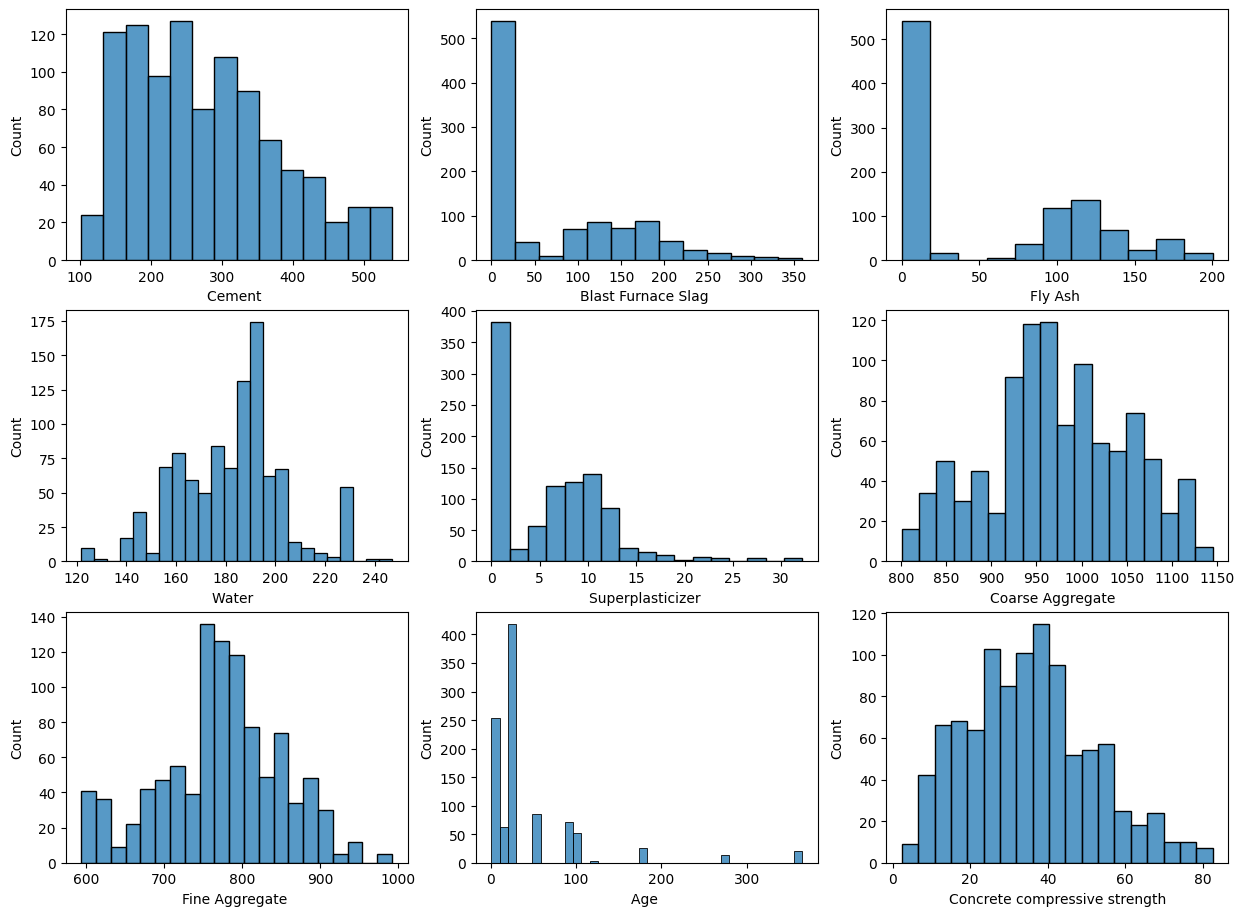

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1
for i in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.histplot(df[i])
    plt.xlabel(i,fontsize =10)
    plotnumber+=1
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

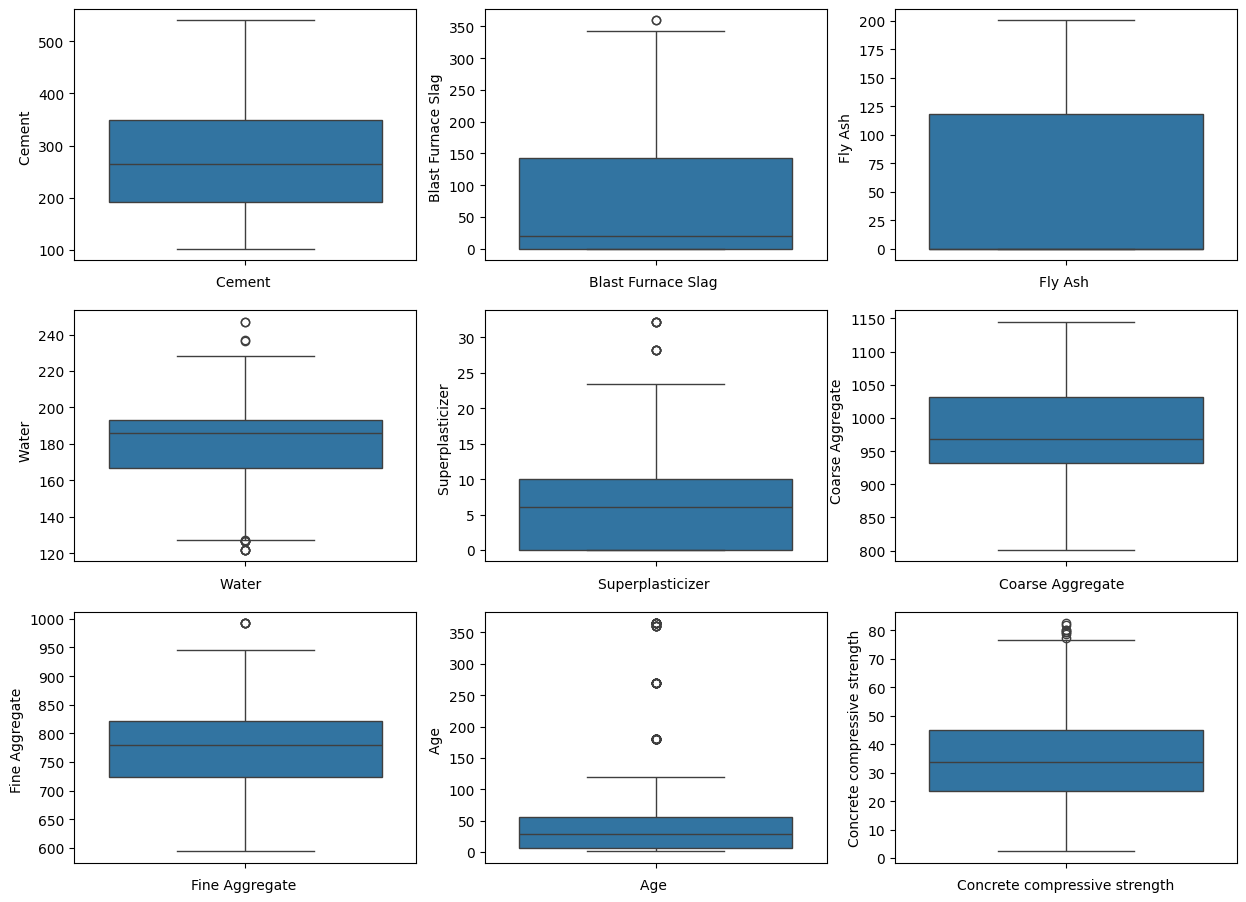

In [18]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for i in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i,fontsize=10)
    
    plotnumber+=1
plt.show


In [19]:
outliers = ['Blast Furnace Slag ',"Water  ", "Superplasticizer ", 'Fine Aggregate ', 'Age ']

In [20]:
def outlier_capping(dataframe: pd.DataFrame,outliers: list):
    df = dataframe.copy()
    for i in outliers:
        q1 = df[i].quantile(0.25)
        q2 = df[i].quantile(0.75)
        iqr = q2 - q1
        upper_limit = q2 + 1.5*iqr
        lower_limit = q2-1.5*iqr
        df.loc[df[i]>upper_limit,i]=upper_limit
        df.loc[df[i]<lower_limit,i]=lower_limit
    return df
df = outlier_capping(dataframe=df,outliers=outliers)

<function matplotlib.pyplot.show(close=None, block=None)>

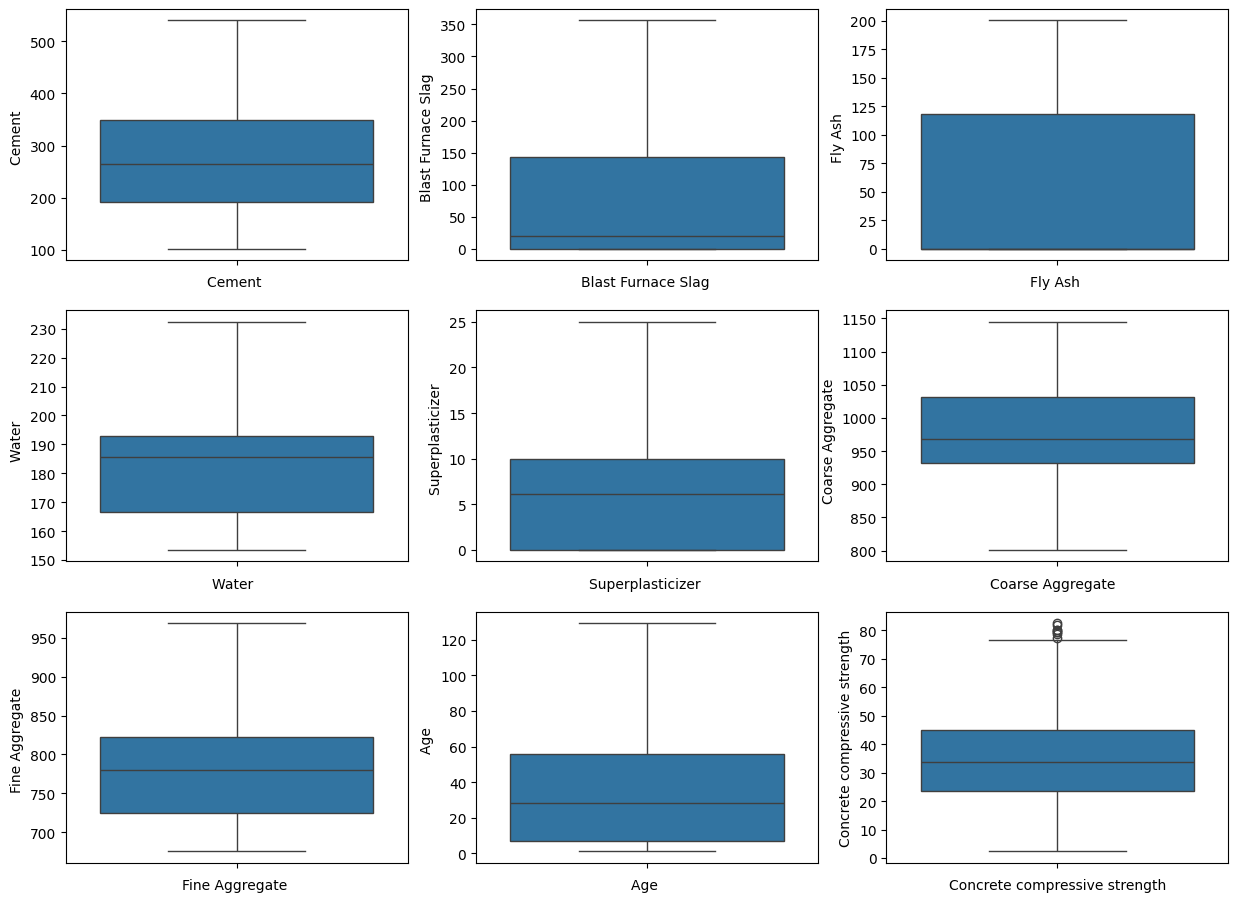

In [21]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for i in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i,fontsize=10)
    
    plotnumber+=1
plt.show


In [13]:
x = df.drop('Concrete',axis=1)
y = df['Concrete']

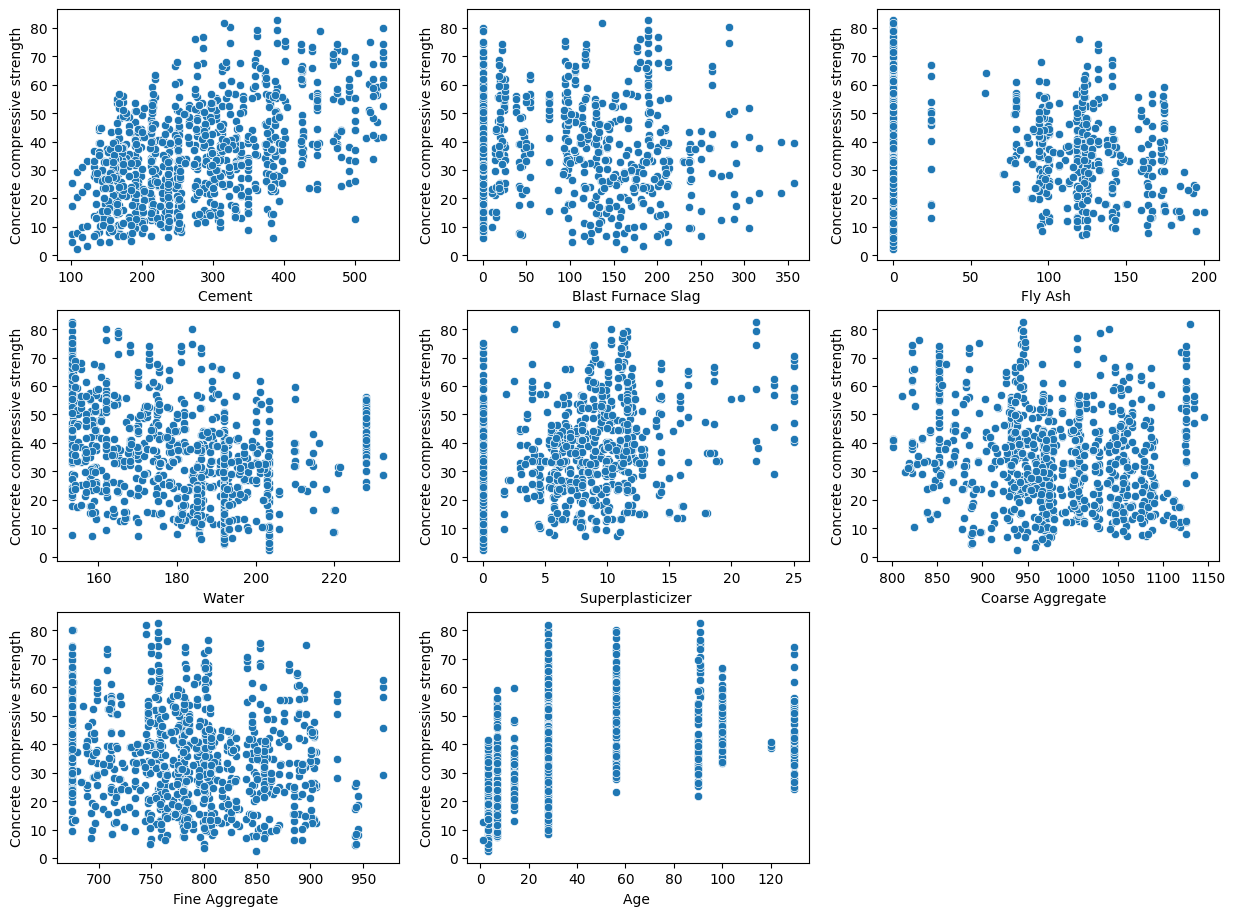

In [23]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for i in x.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.scatterplot(x = df[i],y=y)
    plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.show()

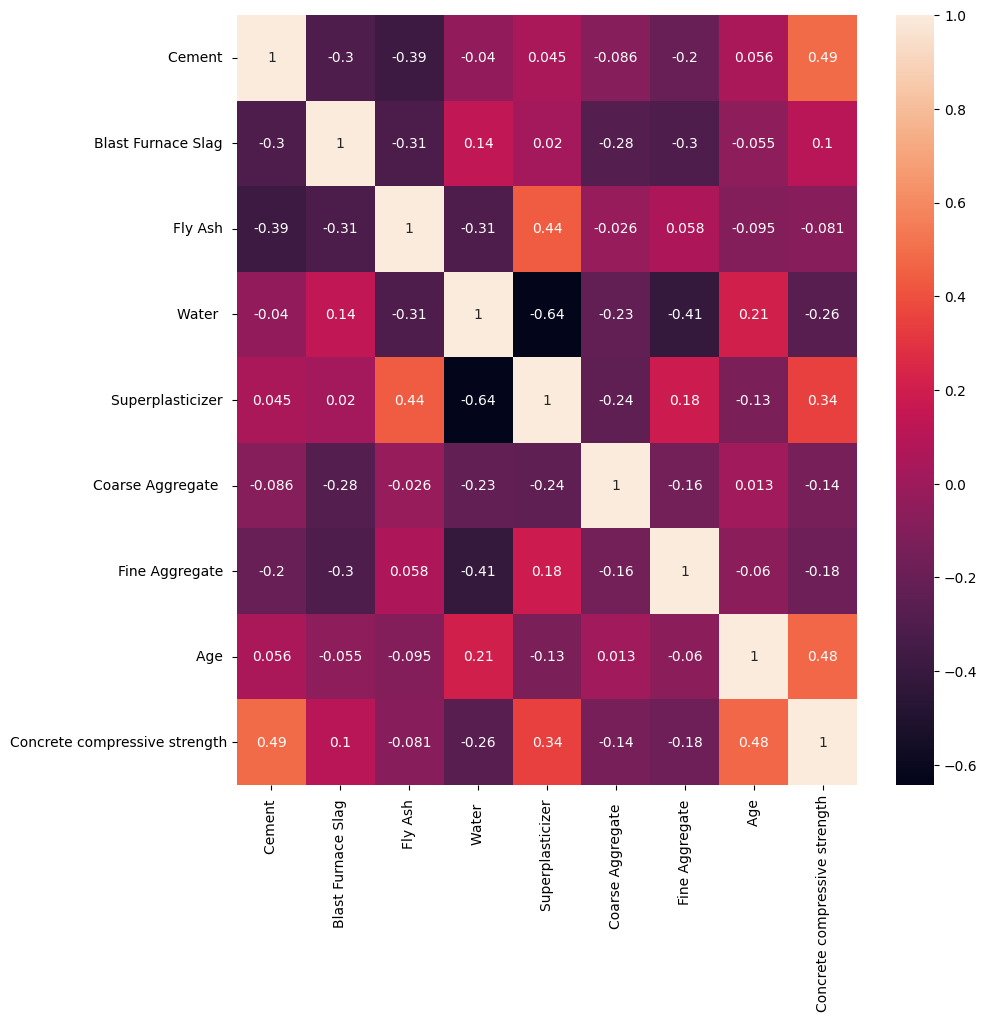

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error,r2_score


In [16]:
def check_model_performance(preprocessor,x_train,y_train,x_test,y_test):
    models={'LinearRegression': LinearRegression(),
            'Ridge Regression' : Ridge(alpha=1),
            'lasso regression': Lasso(alpha=1),
            'RandomForestRegressor': RandomForestRegressor(max_depth=5),
            "GradientBoostingRegressor":GradientBoostingRegressor(learning_rate=0.1)}
    for model_name,model in models.items():
        pipeline = make_pipeline(preprocessor,model)
        pipeline.fit(x_train,y_train)
        y_pred = pipeline.predict(x_test)
        mse = mean_squared_error(y_test,y_pred)
        r2 = r2_score(y_test,y_pred)
        print(f"{model_name} - Mean squared error = {mse:.2f}\n {model_name} - r2 = {r2:.2f}")
        
              




In [32]:
preprocessor_01 = make_pipeline(KNNImputer(n_neighbors=3), StandardScaler())
preprocessor_02 = make_pipeline(KNNImputer(n_neighbors=3), MinMaxScaler())
preprocessor_03 = make_pipeline(KNNImputer(n_neighbors=3), RobustScaler())

print(f"{'=' * 10} Result for StandardScaler {'=' *10}")
check_model_performance(preprocessor_01, x_train, y_train, x_test, y_test)

print(f"\n{'=' * 10} Result for MinMaxScaler {'=' *10}")
check_model_performance(preprocessor_02,x_train, y_train, x_test, y_test)

print(f"\n{'=' * 10} Result for RobustScaler {'=' *10}")
check_model_performance(preprocessor_03, x_train, y_train, x_test, y_test)

========== Result for StandardScaler ==========
LinearRegression - Mean squared error = 88.36
 LinearRegression - r2 = 0.69
Ridge Regression - Mean squared error = 88.32
 Ridge Regression - r2 = 0.69
lasso regression - Mean squared error = 100.03
 lasso regression - r2 = 0.65
RandomForestRegressor - Mean squared error = 52.42
 RandomForestRegressor - r2 = 0.82
GradientBoostingRegressor - Mean squared error = 34.50
 GradientBoostingRegressor - r2 = 0.88

========== Result for MinMaxScaler ==========
LinearRegression - Mean squared error = 88.36
 LinearRegression - r2 = 0.69
Ridge Regression - Mean squared error = 88.32
 Ridge Regression - r2 = 0.69
lasso regression - Mean squared error = 181.19
 lasso regression - r2 = 0.37
RandomForestRegressor - Mean squared error = 52.23
 RandomForestRegressor - r2 = 0.82
GradientBoostingRegressor - Mean squared error = 34.34
 GradientBoostingRegressor - r2 = 0.88

========== Result for RobustScaler ==========
LinearRegression - Mean squared error = 

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators' : [100,200],
             'learning_rate' : [0.1, 0.01],
             'max_depth' : [5,3,7],
             'min_samples_split': [2,4],
             'min_samples_leaf' : [1,2,3]}
gb_rg = GradientBoostingRegressor()
grid = GridSearchCV(gb_rg, param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
grid.fit(x_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [5, 3, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [18]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [19]:
grid.best_score_

-22.03939224525032

In [20]:
grid.best_index_

9

In [21]:
gb_rg = GradientBoostingRegressor(learning_rate= 0.1,
 max_depth= 5,
 min_samples_leaf= 3,
 min_samples_split= 2,
 n_estimators= 200)

In [22]:
gb_rg.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=3, n_estimators=200)